In [1]:
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
raw_data=pd.read_csv('loan.csv')
pre_df=raw_data

In [3]:
raw_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [4]:
raw_data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32940,30,management,married,university.degree,no,no,yes,cellular,jul,mon,833,5,999,0,nonexistent,no
32941,28,blue-collar,single,basic.9y,no,yes,no,cellular,apr,thu,315,1,2,1,success,yes
32942,44,entrepreneur,married,professional.course,no,yes,no,telephone,nov,mon,291,3,999,0,nonexistent,no
32943,47,admin.,married,basic.9y,no,yes,no,telephone,nov,fri,64,3,999,0,nonexistent,no
32944,29,blue-collar,married,basic.6y,no,no,no,cellular,may,thu,16,7,999,0,nonexistent,no
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [5]:
raw_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
raw_data.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [8]:
raw_data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [9]:
raw_data.shape

(32950, 16)

In [10]:
raw_data.size

527200

In [11]:
raw_data=raw_data.drop(["default","campaign","pdays","poutcome"],axis=1)
raw_data

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,previous,y
0,49,blue-collar,married,basic.9y,no,no,cellular,nov,wed,227,0,no
1,37,entrepreneur,married,university.degree,no,no,telephone,nov,wed,202,1,no
2,78,retired,married,basic.4y,no,no,cellular,jul,mon,1148,0,yes
3,36,admin.,married,university.degree,yes,no,telephone,may,mon,120,0,no
4,59,retired,divorced,university.degree,no,no,cellular,jun,tue,368,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,yes,no,cellular,jul,tue,192,0,no
32946,52,technician,married,professional.course,yes,no,cellular,nov,fri,64,1,no
32947,54,admin.,married,basic.9y,no,yes,cellular,jul,mon,131,0,no
32948,29,admin.,married,university.degree,no,no,telephone,may,fri,165,0,no


In [12]:
raw_data.duplicated().sum()

18

In [13]:
raw_data=raw_data.drop_duplicates()
raw_data.shape

(32932, 12)

In [14]:
raw_data.isnull().all()

age            False
job            False
marital        False
education      False
housing        False
loan           False
contact        False
month          False
day_of_week    False
duration       False
previous       False
y              False
dtype: bool

In [15]:
raw_data=raw_data.dropna()

In [16]:
raw_data['age'].describe()

count    32932.000000
mean        40.012723
std         10.400249
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [17]:
pd.cut(raw_data['age'],bins=[0,18,40,100],labels=["Teen","Young","Old"]).value_counts()

Young    18969
Old      13938
Teen        25
Name: age, dtype: int64

In [18]:
raw_data['job'].value_counts()

admin.           8308
blue-collar      7438
technician       5396
services         3194
management       2345
retired          1363
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

In [19]:
maritaldata=raw_data['marital'].value_counts()
maritaldata

married     19943
single       9253
divorced     3671
unknown        65
Name: marital, dtype: int64

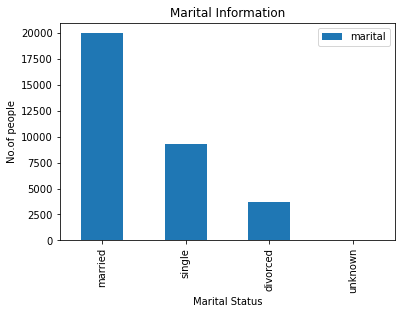

In [20]:
marrieddata=pd.DataFrame(maritaldata)
marrieddata.plot.bar(xlabel="Marital Status",ylabel="No.of people",title="Marital Information");

In [21]:
educated=raw_data['education'].value_counts()
educated

university.degree      9730
high.school            7592
basic.9y               4826
professional.course    4189
basic.4y               3319
basic.6y               1864
unknown                1396
illiterate               16
Name: education, dtype: int64

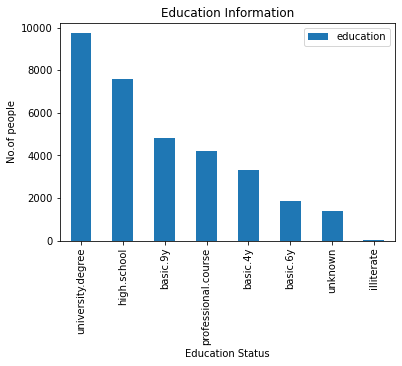

In [22]:

edu_df=pd.DataFrame(educated)
edu_df.plot.bar(xlabel="Education Status",ylabel="No.of people",title="Education Information");

In [23]:
raw_data["housing"].describe()

count     32932
unique        3
top         yes
freq      17246
Name: housing, dtype: object

In [24]:
raw_data["loan"].describe()

count     32932
unique        3
top          no
freq      27113
Name: loan, dtype: object

In [25]:
contact_data=raw_data['contact'].value_counts()
contact_data

cellular     20894
telephone    12038
Name: contact, dtype: int64

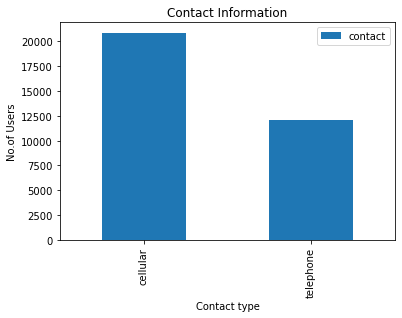

In [26]:
contact_df=pd.DataFrame(contact_data)
contact_graph=contact_df.plot(kind="bar",xlabel="Contact type",ylabel="No.of Users",title="Contact Information");

In [27]:
month_data=raw_data['month'].value_counts()
month_data

may    11005
jul     5761
aug     4942
jun     4247
nov     3265
apr     2084
oct      586
sep      464
mar      435
dec      143
Name: month, dtype: int64

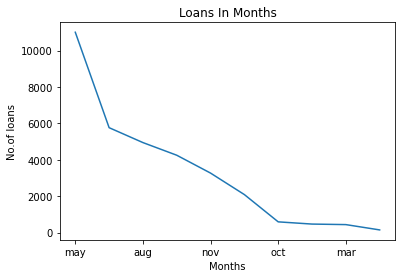

In [28]:
month_graph=pd.DataFrame(month_data)
month_data.plot(xlabel="Months",ylabel="No.of loans",title="Loans In Months");

In [29]:
week_data=pd.DataFrame(raw_data['day_of_week'].value_counts())
week_data.reindex(['mon','tue','wed','thu','fri'])

,day_of_week
mon,6810
tue,6439
wed,6513
thu,6852
fri,6318


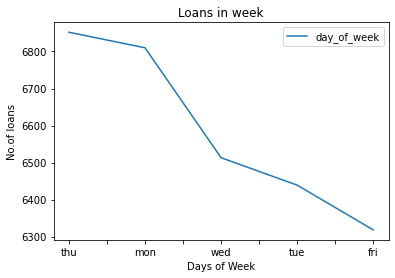

In [30]:
week_data.plot(xlabel="Days of Week",ylabel="No.of loans",title='Loans in week');

In [31]:
raw_data["job"].value_counts()

admin.           8308
blue-collar      7438
technician       5396
services         3194
management       2345
retired          1363
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

In [32]:
grp=raw_data["job"].groupby(raw_data["marital"])

In [33]:
maplot=grp.value_counts()
maplot

marital   job          
divorced  admin.           1028
          technician        606
          blue-collar       577
          services          429
          retired           273
          management        268
          entrepreneur      139
          housemaid         128
          self-employed     110
          unemployed         93
          unknown            11
          student             9
married   blue-collar      5390
          admin.           4172
          technician       2934
          services         1850
          management       1681
          retired          1009
          entrepreneur      859
          self-employed     698
          housemaid         631
          unemployed        501
          unknown           184
          student            34
single    admin.           3097
          technician       1846
          blue-collar      1459
          services          910
          student           667
          management        394
          self-e

In [34]:
grp.describe()

,count,unique,top,freq
marital,,,,
divorced,3671,12,admin.,1028
married,19943,12,blue-collar,5390
single,9253,12,admin.,3097
unknown,65,12,blue-collar,12


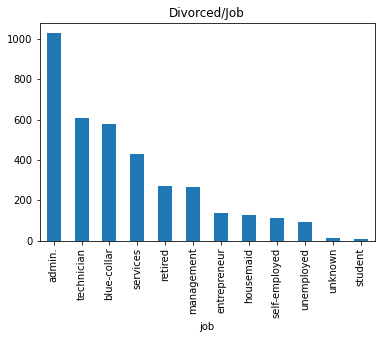

In [35]:
maplot["divorced"].plot(kind="bar",title="Divorced/Job");

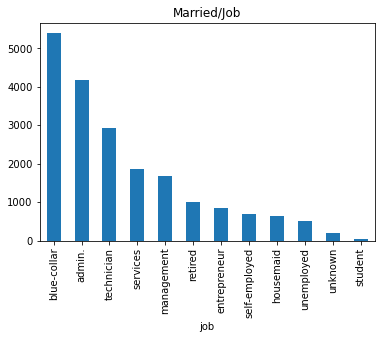

In [36]:
maplot["married"].plot(kind="bar",title="Married/Job");

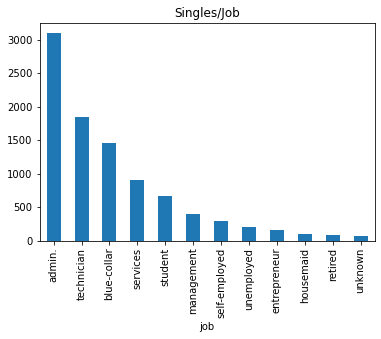

In [37]:
maplot["single"].plot(kind="bar",title="Singles/Job");

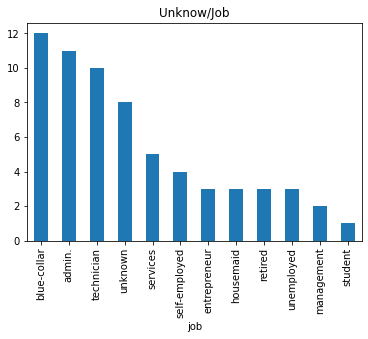

In [38]:
maplot["unknown"].plot(kind="bar",title="Unknow/Job");

In [39]:
raw_data["y"].value_counts()

no     29221
yes     3711
Name: y, dtype: int64

In [40]:
raw_data["previous"].value_counts()

0    28399
1     3672
2      606
3      175
4       60
5       14
6        5
7        1
Name: previous, dtype: int64

In [41]:
loans=raw_data["housing"].groupby(raw_data["loan"])

In [42]:
loans1=loans.value_counts()

In [43]:
loans1=loans1.drop(labels="unknown",axis=0)
loans1

loan  housing
no    yes        14276
      no         12837
yes   yes         2970
      no          2053
Name: housing, dtype: int64

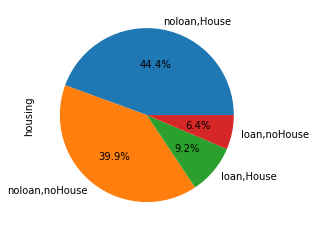

In [44]:
loans1[["no","yes"]].plot(kind="pie",labels=["noloan,House","noloan,noHouse","loan,House","loan,noHouse"],autopct='%1.1f%%');

In [45]:
pre_df=pre_df[["duration","campaign","age"]]

In [46]:
y=pre_df["age"]
y=np.array(y)
y

array([49, 37, 78, ..., 54, 29, 35])

In [47]:
del pre_df["age"]

In [48]:
pre_df=np.array(pre_df)
pre_df

array([[ 227,    4],
       [ 202,    2],
       [1148,    1],
       ...,
       [ 131,    4],
       [ 165,    1],
       [ 544,    3]])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pre_df, y, test_size = 0.10, random_state = 0)

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(X_train)
xtest=sc.fit_transform(X_test)

In [51]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(xtrain,y_train)
y_pred=linreg.predict(xtest)


In [52]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
y_pred

array([40.01726494, 40.03347947, 40.06503708, ..., 40.01159597,
       40.02360285, 40.02801303])

In [53]:
linreg.score(X_test, y_pred)

1.0